## Basics 

In [57]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [58]:
# tf.math (reduce_min, reduce_max, argmin, argmax, reduce_mean, reduce_sum...)
# tf.metrics (accuaracy, recall, precision...)
# tf.keras 
# tf.keras.activations
# tf.keras.callbacks
# tf.keras.datasets
# tf.keras.layers
# tf.keras.losses
# tf.keras.optimizers
# model = tf.keras.Sequential()
# model.evaluate, model.summary, model.predict, model.compile, model.fit
# tf.range, tf.random, tf.cast, tf.one_hot, tf.expand_dims, tf.squeeze, tf.reshape, tf.round, tf.contsant, tf.Variable, tf.zeros
# tf.float32, tf.float16 this can make a big difference in a real word project
# indexing in tensor 
# tf.round and tf.argmax very usefull to convert y_prods to y_pred in classification problems 

In [59]:
vector = tf.constant(np.arange(10), dtype=tf.float16, shape=(5,2))
vector = tf.cast(tf.reshape(tf.range(10), shape=(5,2)), dtype=tf.float16) # vector = tf.cast(tf.range(0,10, delta=1).numpy().reshape((5,2)), tf.float32)
tf.squeeze(tf.expand_dims(vector, axis=-1)) # <=> tf.constant(tf.expand_dims(vector, axis=-1).numpy().squeeze())
print("Done")

Done


In [60]:
tf.random.set_seed(42)
tf.random.normal([2, 3], dtype=tf.float16)
tf.random.uniform([2,3], minval=2, maxval=9, dtype=tf.int32)
tf.cast(tf.round(tf.random.normal([2, 3])), dtype=tf.int16)
print("Done")

Done


In [61]:
img = tf.zeros(shape=(512,512,3), dtype=tf.int16)
# plt.imshow(img);
print("Done")

Done


In [62]:
# Some maths 
tf.random.set_seed(42)
vector = tf.reshape(tf.random.shuffle(tf.range(10)), (5,2))
# print(vector)
tf.math.reduce_min(vector, axis=None) # <=> vector.numpy().min()
tf.math.argmax(vector, axis=None) # <=> vector.numpy().argmax() ATTENTION! axis=0 <=> axis=None just in this case 
# tf.math.reduce_sum(vector)
# Indexing like numy 
vector[-1]
vector[3,1]
print('Done')

Done


In [63]:
# tf.one_hot(tf.constant(['skandar', 'hani']), depth=2) # must be numeric 
# one hot encoding here is just put 1 in the column of the value 
# so depth should be equale to indices.max + 1and not len(indices) don't confuse 
tf.one_hot([1,2,5], depth=4)
print('Done')

Done


# Regression

In [64]:
# Data 
X = tf.range(1000)
y = tf.math.add(X, 5)

### Regression problem 01

In [65]:
# Splitting our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.1, shuffle=True, random_state=42)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
sc_x = MinMaxScaler()
X_train_scaled = sc_x.fit_transform(tf.reshape(X_train, (-1, 1)))
X_test_scaled = sc_x.transform(tf.reshape(X_test, (-1,1)))

In [68]:
sc_y = MinMaxScaler()
sc_y.fit_transform(tf.reshape(y_train, (-1, 1)))[:2]

array([[0.71671672],
       [0.35135135]])

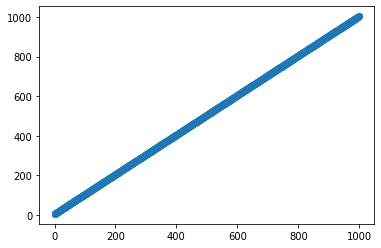

In [69]:
# Visualisation
plt.scatter(X, y);

In [70]:
X_train, y_train, X_test, y_test = tf.constant(X_train), tf.constant(y_train), tf.constant(X_test), tf.constant(y_test)

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(TensorShape([900]),
 TensorShape([900]),
 TensorShape([100]),
 TensorShape([100]))

In [72]:
# without scaling our data 
# shape of input layer => 1 | shape of output layer => 1
# Set random seed 
tf.random.set_seed(42)
# Creating the model 
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation=tf.keras.activations.linear),
                               tf.keras.layers.Dense(100, activation=tf.keras.activations.linear),
                               tf.keras.layers.Dense(1)
], name="model_1")
# compiling the model 
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])
# fitting the model 
# why this give bad performance 
# history_1 = model_1.fit(tf.expand_dims(X_train, axis=0), tf.expand_dims(y_train, axis=0), epochs=100)
# why this is returning us an error 
# history_1 = model_1.fit(tf.expand_dims(X_train, axis=0), y_train, epochs=100)
# 
history_1 = model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [73]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 7.1263 - mae: 7.1263


[7.126336574554443, 7.126336574554443]

In [75]:
model_1.predict([200], verbose=0)

array([[201.95758]], dtype=float32)

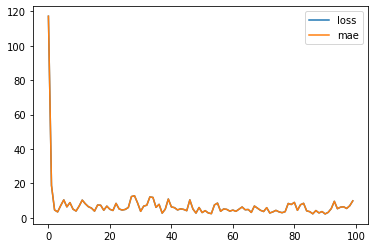

In [76]:
pd.DataFrame(history_1.history).plot();

In [77]:
# scaling our data 
# shape of input layer => 1 | shape of output layer => 1
# Set random seed 
tf.random.set_seed(42)
# Creating the model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation=tf.keras.activations.linear),
                               tf.keras.layers.Dense(100, activation=tf.keras.activations.linear),
                               tf.keras.layers.Dense(1)
], name="model_1")
# compiling the model 
model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])
# fitting the model 
# why this give bad performance 
# history_1 = model_1.fit(tf.expand_dims(X_train, axis=0), tf.expand_dims(y_train, axis=0), epochs=100)
# why this is returning us an error 
# history_1 = model_1.fit(tf.expand_dims(X_train, axis=0), y_train, epochs=100)
# 
history_2 = model_2.fit(X_train_scaled, y_train, epochs=100, verbose=0)

In [78]:
model_2.predict(sc_x.transform([[3009]]))

array([[3011.315]], dtype=float32)

In [79]:
model_2.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.7774 - mae: 0.7774


[0.7774292826652527, 0.7774292826652527]

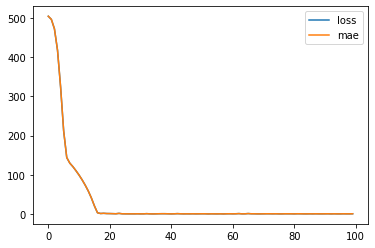

In [80]:
pd.DataFrame(history_2.history).plot();

## Regression problem 2 

In [81]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
data.head()
# age -> scale it 
# sex -> categoriacal (encode it)
# bmi -> scaling 
# children -> scale or not 
# smoker -> encode it 
# region -> one hot encoding 
# charges -> scale it 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
data.age.nunique()
data.age.unique()
data.age.max()
data.age.min()
sum(data.age.isna())

0

In [83]:
# encoding -> splitting -> scaling 
data.sex.nunique()
data.sex.unique()
data.smoker.nunique()
data.smoker.unique()
data.region.nunique()
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [84]:
# label encoding 
# data.sex[data.sex == 'male'] = 1
# data.sex[data.sex == 'female'] = 0

In [85]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["sex"] = le.fit_transform(data.sex)

In [86]:
data["smoker"] = le.fit_transform(data.smoker)

In [87]:
# one hot encoding 
# using tensorflow 
encoded_region = le.fit_transform(data.region)
tf.one_hot(encoded_region, depth=encoded_region.max()+1)

<tf.Tensor: shape=(1338, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)>

In [88]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [89]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
oe = OneHotEncoder()
oe.fit_transform(tf.reshape(data.region, (-1,1))).toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [91]:
data = pd.get_dummies(data,columns=["region"])

In [92]:
X = data.drop("charges", axis=1).values
y = data["charges"].values

In [93]:
# Splitting our data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

In [94]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1137, 9), (1137,), (201, 9), (201,))

In [95]:
X_train[:2]

array([[25.   ,  1.   , 25.74 ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [55.   ,  1.   , 28.975,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         0.   ]])

In [96]:
# Scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [97]:
sc_charges = StandardScaler()
y_train = sc_charges.fit_transform(y_train.reshape(-1,1))
y_test = sc_charges.transform(y_test.reshape(-1,1))

In [98]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([
                        ('age', StandardScaler(), [0]),
                        ('bmi', StandardScaler(), [2])
])

In [99]:
temp = ct.fit_transform(X_train)
X_train[:,0] , X_train[:,2] = temp[:,0], temp[:,1]

In [100]:
temp = ct.transform(X_test)
X_test[:,0] , X_test[:,2] = temp[:,0], temp[:,1]

In [101]:
# input shape =>(Xtrain.shape[0]) , output shape => 1(charges)
# set random
tf.random.set_seed(42)
# create model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1),
])
# compile it 
model.compile(loss=tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(), metrics=["mae"])
# fitting model 
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [102]:
model.evaluate(X_test, y_test, verbose=0)

[0.17849572002887726, 0.17849572002887726]

In [103]:
y_pred = model.predict(X_test)

10888.998221875001

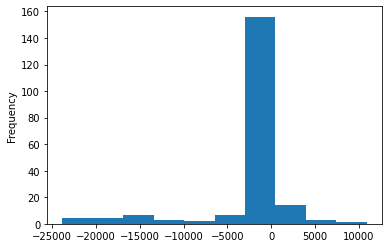

In [104]:
differnce = sc_charges.inverse_transform(model.predict(X_test)) - sc_charges.inverse_transform(y_test)
pd.Series(differnce.squeeze()).plot.hist();
differnce.max()
# epsilon : marge permise pour l'erreur 

In [105]:
epsilon = 1000
print("Totale : ", )
sum(differnce<=100) 

Totale : 


array([147])

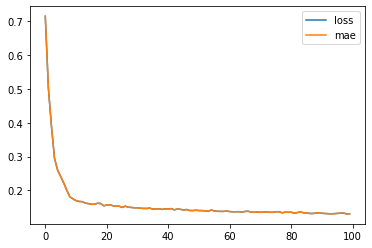

In [106]:
pd.DataFrame(history.history).plot();

In [107]:
data.charges.median()

9382.033

In [108]:
# 
tf.metrics.mae(y_test.squeeze(), y_pred.squeeze())

<tf.Tensor: shape=(), dtype=float32, numpy=0.17849573>

In [109]:
model.evaluate(X_test, y_test)[0]

7/7 [==============================] - 0s 2ms/step - loss: 0.1785 - mae: 0.1785


0.17849572002887726

In [110]:
tf.metrics.mse(y_test.squeeze(), y_pred.squeeze())

<tf.Tensor: shape=(), dtype=float32, numpy=0.20677419>

In [111]:
# input shape =>(Xtrain.shape[0]) , output shape => 1(charges)
# set random
tf.random.set_seed(42)
# create model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1),
])
# compile it 
model.compile(loss=tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.MSE])
# fitting model 
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

In [112]:
model.evaluate(X_test, y_test, verbose=0)

[0.17849572002887726, 0.20677420496940613]

In [113]:
y_pred = model.predict(X_test)

In [114]:
y_test.shape

(201, 1)

10888.998221875001

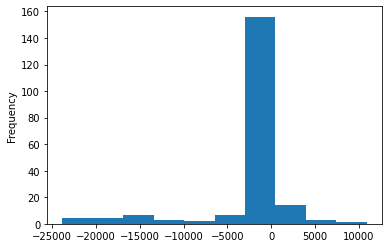

In [115]:
differnce = sc_charges.inverse_transform(model.predict(X_test)) - sc_charges.inverse_transform(y_test)
pd.Series(differnce.squeeze()).plot.hist();
differnce.max()

# Classification

### Binary classification (only two classes)

In [116]:
from sklearn.datasets import make_circles

In [117]:
X, y = make_circles(n_samples=500, noise=0.03)

In [118]:
data = pd.DataFrame({"x":X[:,0], "y":X[:,1],"label":y})
data.head(2)

,x,y,label
0,-0.062089,-0.831053,1
1,-0.797632,-0.043104,1


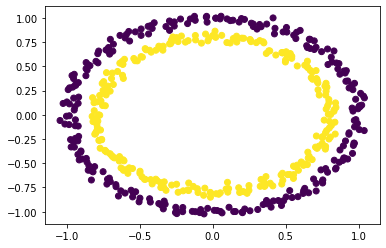

In [119]:
# Visualisation
plt.scatter(X[:,0], X[:,1], c=y);

In [120]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.15)

In [121]:
# input shape X_train | output shape => 1
# set seed 
# this model is getting 1 accuracy !!!!!!!!!!!!!!!!!!!! even that it predicts [-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.] visualize to more understand
# tf.random.set_seed(42)
# # create model 
# model = tf.keras.Sequential([
#        tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
#        tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
#        tf.keras.layers.Dense(1)                      
# ])
# # compiling the model (parentheses ? )
# model.compile(loss=tf.keras.losses.binary_crossentropy ,optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
# # fitting the model 
# model.fit(X_train, y_train, epochs=100, verbose=1)

tf.random.set_seed(42)
# create model 
model = tf.keras.Sequential([
      #  tf.keras.layers.Dense(100),
       tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
       tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)                      
])
# compiling the model (parentheses ? )
model.compile(loss=tf.keras.losses.binary_crossentropy ,optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
# fitting the model 
model.fit(X_train, y_train, epochs=300, verbose=0)


In [122]:
model.predict([[X_train[0, 0], X_train[0, 1]]])

array([[0.8449509]], dtype=float32)

In [123]:
model.evaluate(X_test, y_test, verbose=0)

[0.09381760656833649, 0.9866666793823242]

grid pred :  [0. 1.]


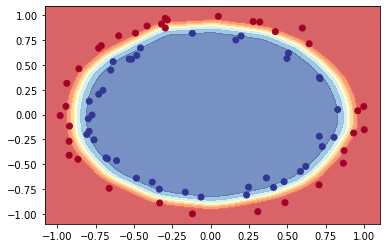

In [124]:
# Visualisation 
def visualize_boundry(model, X, y, doubt=False):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  # all the points 
  x_axis = np.linspace(start=x_min, stop=x_max, num=100)
  y_axis = np.linspace(start=y_min, stop=y_max, num=100)
  xv, yv = np.meshgrid(x_axis, y_axis)
  grid = np.c_[xv.ravel(), yv.ravel()]
  grid_prob = model.predict(grid)
  grid_pred = np.round(grid_prob)
  print("grid pred : ",np.unique(grid_pred))
  # plt.scatter(grid[:,0], grid[:,1], c=grid_pred,cmap=plt.cm.RdYlBu, alpha=0.2)
  if doubt:
    plt.contourf(xv, yv, grid_prob.reshape(xv.shape), cmap=plt.cm.RdYlBu, alpha=0.7)
  else: 
    plt.contourf(xv, yv, grid_pred.reshape(xv.shape), cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
  # y_pred = np.round(model.predict(X_test))
  # if (X_test!=None):
  #   plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap=plt.cm.RdYlBu)
  
visualize_boundry(model, X_test, y_test, doubt=True)

In [125]:
model.evaluate(X_test, y_test, verbose=0)

[0.09381760656833649, 0.9866666793823242]

In [126]:
y_prob = model.predict(X_test)
y_pred = np.round(y_prob)

In [127]:
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_test, y_pred)
accuracy.result().numpy()

0.9866667

In [128]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result().numpy()

0.9756098

In [129]:
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result().numpy()

1.0

In [130]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[34,  1],
       [ 0, 40]])

In [131]:
y_prob.max()

0.9906156

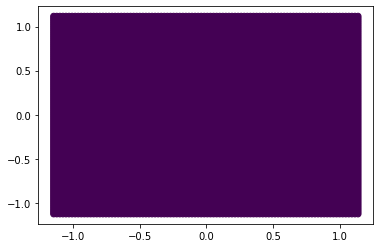

In [132]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
# all the points 
x_axis = np.linspace(start=x_min, stop=x_max, num=100)
y_axis = np.linspace(start=y_min, stop=y_max, num=100)
xv, yv = np.meshgrid(x_axis, y_axis)
grid = np.c_[xv.ravel(), yv.ravel()]
grid_prob = model.predict(grid)
grid_pred = np.round(grid_prob)
plt.scatter(grid[:,0], grid[:,1], c=np.ones(len(grid_prob))*0.1)

In [133]:
np.ones(len(grid_prob))*0.1

array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])

### Multiclass Classification

In [134]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [135]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [136]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [137]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

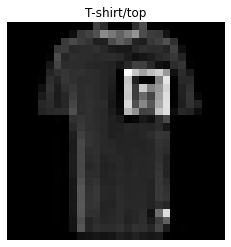

In [138]:
# get familiare with the dataset 
ind = np.random.randint(0, X_train.shape[0] - 1)
plt.imshow(X_train[ind], cmap='gray');
plt.title(class_names[y_train[ind]])
plt.axis(False);

In [139]:
# input shape (28, 28) | output shape 9 (len classes)
# set random seed 
tf.random.set_seed(42)
# create model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
# compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
# fit model
model.fit(X_train, y_train, epochs=10, verbose=0)

In [140]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 16.7287 - accuracy: 0.7434


[16.728654861450195, 0.743399977684021]

In [141]:
model.predict(tf.expand_dims(X_test[10], axis=0))

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.328433e-38, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [142]:
y_probs = model.predict(X_test)

In [143]:
y_pred = y_probs.argmax(axis=1)

In [144]:
# nb of false predictions 
len(y_test) - sum(y_pred == y_test)

2566

In [145]:
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_test, y_pred)
accuracy.result().numpy()

0.7434

In [146]:
recall = tf.keras.metrics.Recall()
recall.update_state(y_test/(len(class_names)-1), y_pred/(len(class_names)-1))
recall.result().numpy()

0.50655556

In [147]:
y_probs.shape

(10000, 10)

In [148]:
confusion_matrix(y_test, y_pred)

array([[604,   3, 152,  49,   7,   1, 170,   0,  14,   0],
       [  3, 942,  22,  24,   0,   0,   6,   0,   1,   2],
       [  8,   2, 955,   9,   9,   1,  14,   0,   2,   0],
       [ 17,  18,  72, 813,  23,   1,  48,   0,   8,   0],
       [  0,   0, 747,  32, 141,   0,  76,   0,   4,   0],
       [  0,   0,   1,   0,   0, 945,   0,  21,   2,  31],
       [ 65,   1, 429,  39,  15,   0, 438,   0,  13,   0],
       [  0,   0,   0,   0,   0, 176,   0, 774,   0,  50],
       [  8,   0,  36,   7,   3,  37,  11,   3, 894,   1],
       [  0,   0,   0,   0,   0,  46,   2,  24,   0, 928]])

In [149]:
def demo(X, y): 
  init = 321
  y_probs = model.predict(X)
  y_pred = y_probs.argmax(axis=1)
  for i in range(init, init+6):
    rand_index = np.random.randint(0, len(y))
    plt.subplot(i)
    plt.imshow(X[rand_index], cmap='gray')
    true_label = class_names[y[rand_index]]
    predicted_label = class_names[y_pred[rand_index]]
    confidence = y_probs[rand_index].max()
    if predicted_label == true_label:
      title_color = 'green'
    else :
      title_color = 'red'
    plt.title(f'{predicted_label} confidence {confidence:.2f}', color=title_color)
    plt.axis(False)
  plt.show()

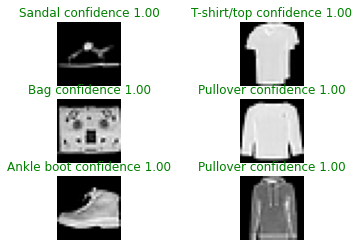

In [150]:
demo(X_test, y_test)

In [151]:
# some stats 
index_of_false_predictions = np.arange(len(y_test))[y_test != y_pred]

In [152]:
# class that caused the most false predictions 
y_test[index_of_false_predictions]

array([6, 4, 7, ..., 4, 6, 8], dtype=uint8)

In [153]:
# what where the most false predictions predicted 
y_pred[index_of_false_predictions]

array([2, 2, 5, ..., 2, 0, 6])

In [154]:
np.c_[y_test[index_of_false_predictions], y_pred[index_of_false_predictions]]

array([[6, 2],
       [4, 2],
       [7, 5],
       ...,
       [4, 2],
       [6, 0],
       [8, 6]])

In [155]:
false_predictions_df = pd.DataFrame({"true_label":y_test[index_of_false_predictions], "predicted_label":y_pred[index_of_false_predictions]})

In [156]:
false_predictions_df.head()

,true_label,predicted_label
0,6,2
1,4,2
2,7,5
3,4,2
4,4,2


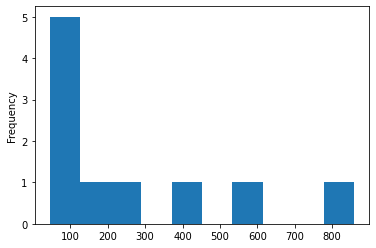

In [157]:
false_predictions_df.true_label.value_counts().plot.hist()

In [158]:
false_predictions_df.predicted_label.value_counts()

2    1459
6     327
5     262
3     160
0     101
9      84
4      57
7      48
8      44
1      24
Name: predicted_label, dtype: int64